In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the csv file

In [2]:
data=pd.read_csv("SampleSuperstore.csv")

In [3]:
data.shape

(9994, 13)

In [4]:
data.Country.unique()

array(['United States'], dtype=object)

Hence there is only one country we can remove it, not a relavent for data analysis

In [6]:
data=data.drop(["Country"],axis=1)

In [7]:
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


we could see the country is removed

In [9]:
data.State.unique().shape

(49,)

In [10]:
print(data.City.unique().shape,data["Postal Code"].unique().shape)

(531,) (631,)


As we can notice we have a huge number of cities and state it is difficult to obtain the information for each part so I have removed State,City,Postal Code, Region

In [11]:
data=data.drop(["State","City","Postal Code","Region"],axis=1)

In [12]:
data["Sub-Category"].unique().shape

(17,)

# Checking any missing values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Category      9994 non-null   object 
 3   Sub-Category  9994 non-null   object 
 4   Sales         9994 non-null   float64
 5   Quantity      9994 non-null   int64  
 6   Discount      9994 non-null   float64
 7   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 624.8+ KB


In [14]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Count of number of products in each category

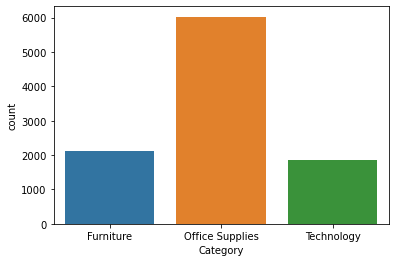

In [15]:
sns.countplot("Category",data=data)
plt.show()

From the above we can conclude that the more number of office supplies is sold.

# Sales in Each category

In [16]:
x=data["Category"].unique()
for i in x:
    print("The total sales for "+i +" is "+str(round(data.loc[data["Category"]==i,"Sales"].sum())))
    

The total sales for Furniture is 742000.0
The total sales for Office Supplies is 719047.0
The total sales for Technology is 836154.0


From this above plot we can conclude that huge amount of sales was sold in Technology.

# Profit in Each category

In [17]:
x=data["Category"].unique()
for i in x:
    print("The total profit for "+i +" is "+str(round(data.loc[data["Category"]==i,"Profit"].sum())))

The total profit for Furniture is 18451.0
The total profit for Office Supplies is 122491.0
The total profit for Technology is 145455.0


From above we can conclude that there was a huge profit in Technology supplies and the furniture supplies was sold for very less

# Profit In each Sub-Category

In [18]:
for i in x:
    pos=data[data.Category==i]
    y=pos["Sub-Category"].unique()
    print("The Total profit in "+i+" Category is "+str(round(data.loc[data["Category"]==i,"Profit"].sum()))+" is divided as")
    print()
    for j in y:
        print("   Sub-Category "+j+" = "+str(round(pos.loc[pos["Sub-Category"]==j,"Profit"].sum())))
    print()
    

The Total profit in Furniture Category is 18451.0 is divided as

   Sub-Category Bookcases = -3473.0
   Sub-Category Chairs = 26590.0
   Sub-Category Tables = -17725.0
   Sub-Category Furnishings = 13059.0

The Total profit in Office Supplies Category is 122491.0 is divided as

   Sub-Category Labels = 5546.0
   Sub-Category Storage = 21279.0
   Sub-Category Art = 6528.0
   Sub-Category Binders = 30222.0
   Sub-Category Appliances = 18138.0
   Sub-Category Paper = 34054.0
   Sub-Category Envelopes = 6964.0
   Sub-Category Fasteners = 950.0
   Sub-Category Supplies = -1189.0

The Total profit in Technology Category is 145455.0 is divided as

   Sub-Category Phones = 44516.0
   Sub-Category Accessories = 41937.0
   Sub-Category Machines = 3385.0
   Sub-Category Copiers = 55618.0



In [19]:
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [20]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

# Total sales for each segment

In [21]:
x=data["Segment"].unique()
for i in x:
    print("The total sales for "+i +" is "+str(round(data.loc[data["Segment"]==i,"Sales"].sum())))
    

The total sales for Consumer is 1161401.0
The total sales for Corporate is 706146.0
The total sales for Home Office is 429653.0


# Profit for each segment

In [22]:
x=data["Segment"].unique()
for i in x:
    print("The total profit for "+i +" is "+str(round(data.loc[data["Segment"]==i,"Profit"].sum())))
    

The total profit for Consumer is 134119.0
The total profit for Corporate is 91979.0
The total profit for Home Office is 60299.0


In [23]:
x=data["Segment"].unique()
for i in x:
    pos=data[data["Segment"]==i]
    y=pos["Ship Mode"].unique()
    print("The entire profit in "+i+" is "+str(round(data.loc[data["Segment"]==i,"Profit"].sum())))
    print("Based on the Ship Mode the profit is divided by")
    print()
    for j in y:
        print("The profit for "+j+" Ship Mode is "+str(round(pos.loc[pos["Ship Mode"]==j,"Profit"].sum())))
    print()

The entire profit in Consumer is 134119.0
Based on the Ship Mode the profit is divided by

The profit for Second Class Ship Mode is 24947.0
The profit for Standard Class Ship Mode is 77924.0
The profit for First Class Ship Mode is 21374.0
The profit for Same Day Ship Mode is 9874.0

The entire profit in Corporate is 91979.0
Based on the Ship Mode the profit is divided by

The profit for Second Class Ship Mode is 18226.0
The profit for Standard Class Ship Mode is 57471.0
The profit for First Class Ship Mode is 14464.0
The profit for Same Day Ship Mode is 1818.0

The entire profit in Home Office is 60299.0
Based on the Ship Mode the profit is divided by

The profit for Standard Class Ship Mode is 28694.0
The profit for Second Class Ship Mode is 14274.0
The profit for First Class Ship Mode is 13131.0
The profit for Same Day Ship Mode is 4199.0



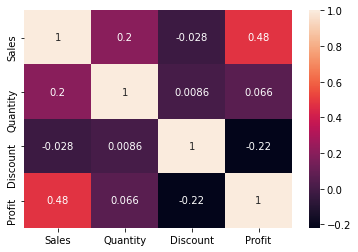

In [24]:
sns.heatmap(data.corr(),annot=True)

# No Correlation amoung the data

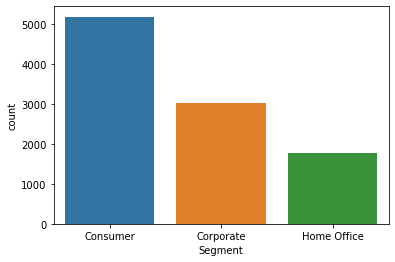

In [26]:
sns.countplot("Segment",data=data)

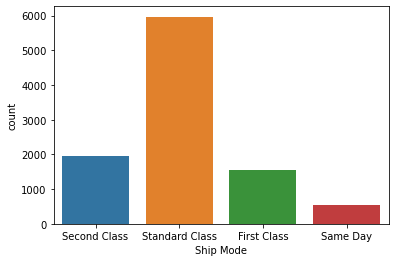

In [27]:
sns.countplot("Ship Mode",data=data)

From this we can say that only few deliveries are delivered on the same day

# The Insights by analysing the data
    1) Office supplies is sold mostly
    2) Huge profit is there in Technology related supplies
    3) There was a huge loss in furniture category because of Tables and Book cases
    4) From the ship mode we can see that most of the product are sent through Standard class, which meaning shipping 
    happens with 6 days.
    5) The total profit in the Home office segment is less
    

# Suggestions for improving the weak areas
    1) The supply chain of the products should improved a lot atleast improving on the first class(within 1 day) and second class(within 2 days).
    2) To get decent profit in the Furniture category it is wise to remove the Tables and Book cases(they bring a huge loss, else try to make improve the quality of the Products).